In [38]:
import pybedtools
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
output_dir = pathlib.Path('InputBed/IntersectWithHuman')
output_dir.mkdir(exist_ok=True)

In [17]:
mouse_lifted_beds = list(pathlib.Path('InputBed/').glob('*bed'))
human_beds = list(pathlib.Path(
    '/home/hanliu/project/mouse_rostral_brain/study/LDSC/human_mCT_paper_major/').glob('*bed'))

mouse_lifted_beds = {p.name.split('.')[0]: pybedtools.BedTool(str(p)) for p in mouse_lifted_beds}
human_beds = {p.name.split('.')[0]: pybedtools.BedTool(str(p)) for p in human_beds}

## Mouse Lifted DMR overlap with Human mCT paper DMR

In [18]:
records = {}
for mouse_name, mouse_bed in mouse_lifted_beds.items():
    print(mouse_name)
    for human_name, human_bed in human_beds.items():
        records[(mouse_name, human_name)] = mouse_bed.intersect(human_bed, wa=True, u=True).to_dataframe().shape[0]
        

D1L-PAL
OPC
EP
PT-L5
CLA
D1L-Fstl4
VLMC
IT-L5
DG
IT-L23
ASC
DG-po
EC
PAL-Inh
IT-L6
LSX-Inh
IG-CA2
OLF-Exc
Unc5c
MGC
OLF
NP-L6
L6b
Gfra1
CT-L6
ODC
VLMC-Pia
IT-L4
Foxp2
MSN-D2
ANP
CGE-Vip
Chd7
CA3-St18
CGE-Lamp5
MGE-Pvalb
PC
MGE-Sst
CA1
CA3
MSN-D1


## Mouse Lifted DMR total

In [19]:
mouse_total = {}
for mouse_name, mouse_bed in mouse_lifted_beds.items():
    mouse_total[mouse_name] = mouse_bed.to_dataframe().shape[0]
mouse_total = pd.Series(mouse_total)

## Save total

In [31]:
counts = pd.Series(records).reset_index()
counts.columns = ['MouseMajorType', 'HumanMajorType', 'MouseDMROverlap']
counts['MouseTotal'] = counts['MouseMajorType'].map(mouse_total)
counts['OverlapRatio'] = counts['MouseDMROverlap'] / counts['MouseTotal']

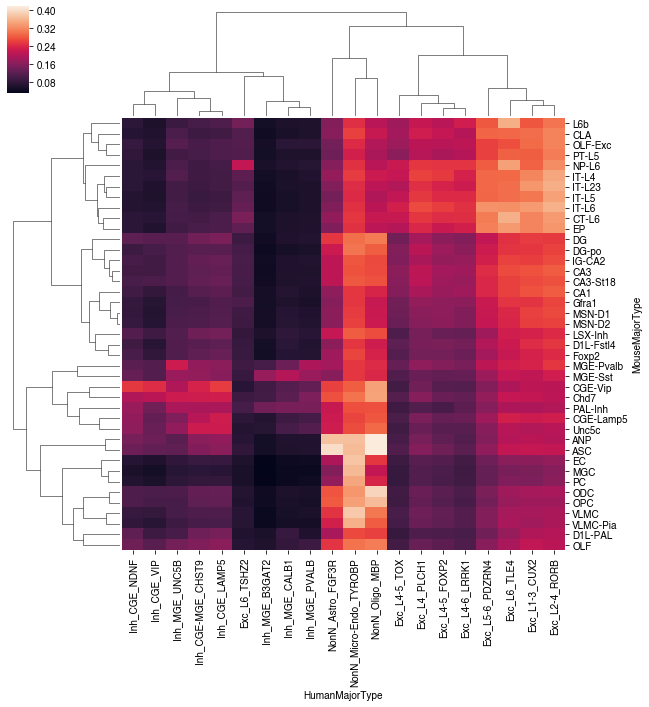

In [40]:
sns.clustermap(counts.set_index(['MouseMajorType', 'HumanMajorType'])['OverlapRatio'].unstack())